
<h1 style="text-align:center; font-family:Times New Roman">CP321 - Sports Car Analysis Project</h1>

<h2 style="text-align:center; font-family:Times New Roman; font-size:1.5em">Nishant Tewari & Dharmik Patel</h2>

<h2 style="text-align:center; font-family:Times New Roman; font-size:1.5em">190684430 & 180343800</h2>

<h1 style="text-align:left; font-family:Times New Roman">Introduction</h1>

<span style="font-family: Times New Roman;">The dataset used for this project can be retrieved from [here](https://www.kaggle.com/datasets/rkiattisak/sports-car-prices-dataset?resource=download)</span>

<span style="font-family: Times New Roman;">The data contains information on various Sports cars across multiple car manufactures such as 
- Make & Model of the car 
- Year of Production 
- Engine Size (L)
- Horsepower (HP)
- Torque (lb-ft)
- 0 - 60 MPH time(seconds)
- Price (USD)
</span> 

<span style="font-family: Times New Roman;">The dataset has 38 unique car manufactures ranging from brands we commonly see on the roads all the way to more exotic rides that are not common at all.</span>
</br>
<span style="font-family: Times New Roman;">The lowest price car on the dataset is the 2021 Chevrolet Camaro priced at $25,000 USD</span>
</br>
<span style="font-family: Times New Roman;">The highest price car on the dataset is the 2022 Bugatti Chiron Super Sport 300+ priced at $5.2 million USD</span>



<h1 style="text-align:left; font-family:Times New Roman">Motivation</h1>

<span style="font-family: Times New Roman;">As kids, we all had dreams and aspirations, and for many of us, owning a sports car was one of them. The mere sight of a sleek, powerful vehicle would leave us in awe and wonder, imagining ourselves behind the wheel. After the hard work you devoted in the past couple of years, it is finally time to buy you very own sports car. However with many possible makes and models to choose from, your left to wonder which one is the perfect car for you?</span>

<h1 style="text-align:left; font-family:Times New Roman">Budget</h1>

<span style="font-family: Times New Roman;">John and his budget of $500,000</span>

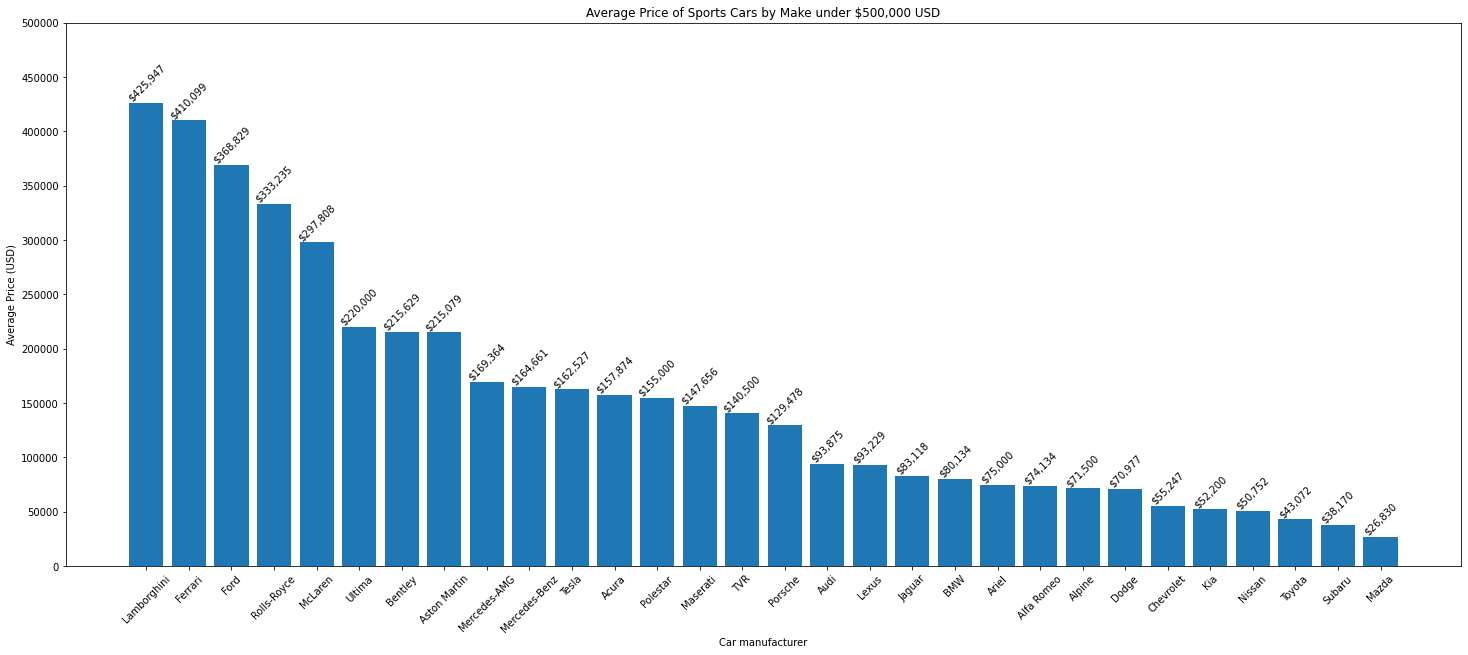

In [38]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/sport_car_price.csv')

# fitler the price column to replace any additonal characters and change to float  
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(float)

# calculating the average price of the cars made by each brand 
avg_prices = df.groupby('Car Make')['Price (in USD)'].mean().reset_index()

# set the overall size of the graph 
plt.figure(figsize=(25, 10))

# filtering the average prices to show car brands that average below $500,000
avg_prices = avg_prices[avg_prices['Price (in USD)'] <= 500000]

# Sort the average price of sports car under $500,000 in descending order
sort_avg_price = avg_prices.sort_values(by='Price (in USD)', ascending=False)

# Plot a bar plot of the average price for each make of car
plt.bar(sort_avg_price['Car Make'], sort_avg_price['Price (in USD)'])

# Set the plot title and axis labels
plt.title('Average Price of Sports Cars by Make under $500,000 USD')
plt.xlabel('Car manufacturer')
plt.ylabel('Average Price (USD)')

# Rotate the names on the x-axis to make it easier to read 
plt.xticks(rotation=45)

# Annotate each bar with the exact average price calculated for each manufacturer
for i, v in enumerate(sort_avg_price['Price (in USD)']):
    plt.text(i, v, f'${round(v, 0):,.0f}', ha='center', va='bottom', rotation=45)

# Set the y-axis labels with an increment of $50,000 between (0 - $500k)
plt.ylim(0, 500000)
plt.yticks(np.arange(0, 500001, 50000))

# plot the graph 
plt.show()

<h1 style="text-align:left; font-family:Times New Roman">Horsepower vs Price</h1>

<span style="font-family: Times New Roman;">John and his interest of knowing the relationship between the two</span>

C:\Users\nisht\AppData\Local\Temp\ipykernel_3904\1818538488.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)


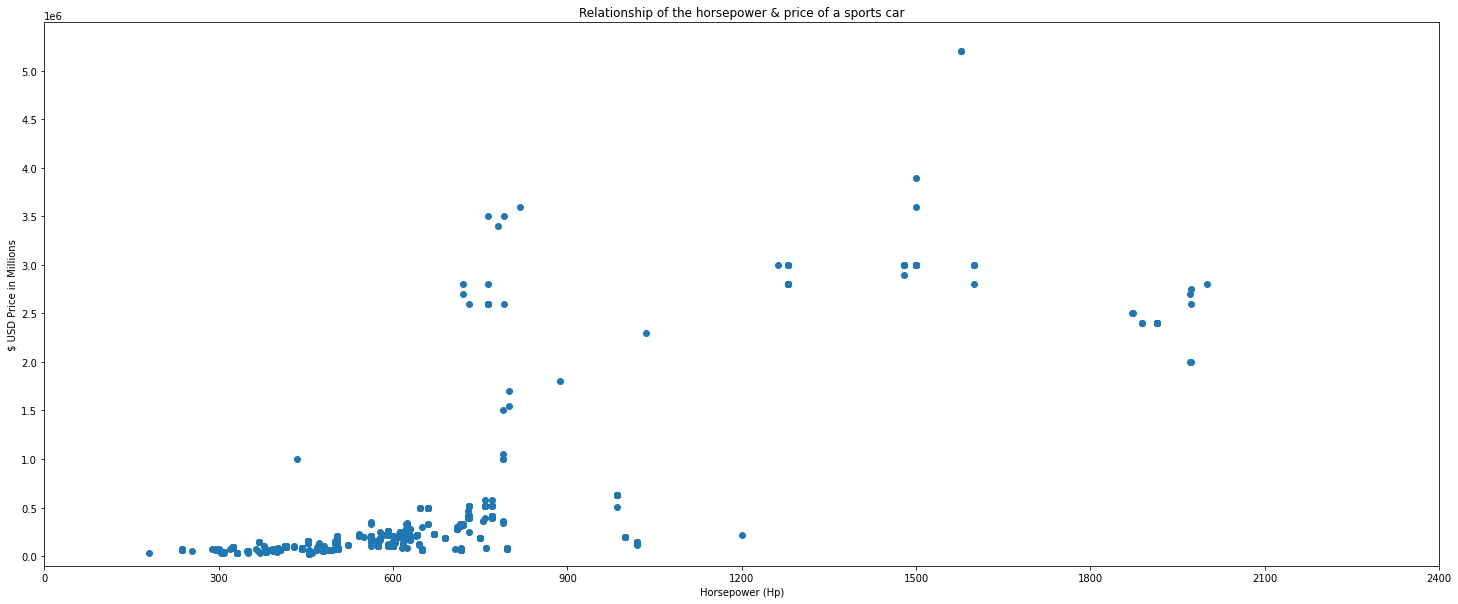

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/sport_car_price.csv')

# fitler the horsepower column to replace any additonal characters and change to float  
df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)

# fitler the price column to replace any additonal characters and change to float  
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(float)

# drop the values above at 10000 -> these numbers are unrealistic 
df = df.drop(df[df['Horsepower'] == 10000].index)

# set the overall size of the graph 
plt.figure(figsize=(25, 10))

# plot the horsepower values accordinly to their prices 
plt.scatter(df['Horsepower'], df['Price (in USD)'])

# Set the plot, title and axis labels of the graph 
plt.title('Relationship of the horsepower & price of a sports car')
plt.xlabel('Horsepower (Hp)')
plt.ylabel('$ USD Price in Millions')

# Set the x-axis labels with an increment of 300 horsepower (0 - 2500 hp)
plt.xticks(np.arange(0, 2501, 300))

# Set the y-axis labels with an increment of $500,000 between (0 - $5.5m)
plt.ylim(-100000, 5500000)
plt.yticks(np.arange(0, 5000001, 500000))

# show the graph 
plt.show()

<h1 style="text-align:left; font-family:Times New Roman">0-60 MPH time vs Year of Production</h1>

<span style="font-family: Times New Roman;">John was curious to see the average acceleration time for the years that the cars were produced</span>

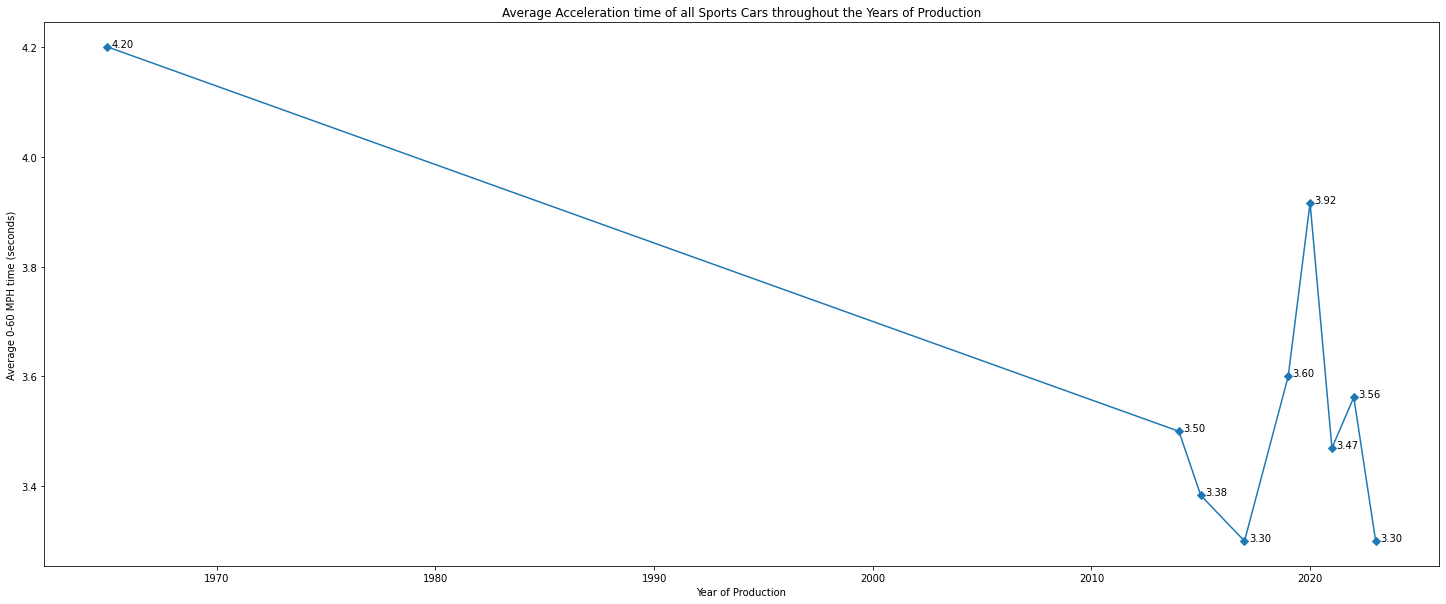

In [24]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/sport_car_price.csv')

# Clean any non numeric data values 
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'], errors='coerce')

# calculating the average acceleration time of all cars in their year of production 
avg_oto60 = df.groupby('Year')['0-60 MPH Time (seconds)'].mean().reset_index()

# set the overall size of the graph 
plt.figure(figsize=(25, 10))

# plot a line graph that shows th
plt.plot(avg_oto60['Year'], avg_oto60['0-60 MPH Time (seconds)'], marker='D')

# Set the plot title and axis labels
plt.title('Average Acceleration time of all Sports Cars throughout the Years of Production')
plt.xlabel('Year of Production')
plt.ylabel('Average 0-60 MPH time (seconds)')

# This annotates the average acceleration time on the line graph
for x, y in zip(avg_oto60['Year'], avg_oto60['0-60 MPH Time (seconds)']):
    plt.annotate(f"{y:.2f}", xy=(x, y), xytext=(x+0.2, y))

# plot the graph 
plt.show()